## Name: Batyrkhan Taldybayev
## Group: IT3-2203
## Date: 27.04.2025
---
## Importing Libraries

In [22]:
import pandas as pd
import numpy as np

from sklearn.cluster import DBSCAN, AgglomerativeClustering, KMeans
from sklearn.metrics import silhouette_score, adjusted_rand_score

In [2]:
data = pd.read_csv("student.csv")
data

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6602,25,69,High,Medium,No,7,76,Medium,Yes,1,High,Medium,Public,Positive,2,No,High School,Near,Female,68
6603,23,76,High,Medium,No,8,81,Medium,Yes,3,Low,High,Public,Positive,2,No,High School,Near,Female,69
6604,20,90,Medium,Low,Yes,6,65,Low,Yes,3,Low,Medium,Public,Negative,2,No,Postgraduate,Near,Female,68
6605,10,86,High,High,Yes,6,91,High,Yes,2,Low,Medium,Private,Positive,3,No,High School,Far,Female,68


In [4]:
from sklearn.preprocessing import LabelEncoder

categorical_columns = [
    "Parental_Involvement", "Access_to_Resources", "Extracurricular_Activities",
    "Motivation_Level", "Learning_Disabilities", "Internet_Access", "Family_Income", "Teacher_Quality", "School_Type",
    "Peer_Influence", "Parental_Education_Level", "Distance_from_Home", "Gender"
]

le = LabelEncoder()
data[categorical_columns] = data[categorical_columns].apply(le.fit_transform)

data

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,1,0,0,7,73,1,1,0,1,2,1,2,3,0,1,2,1,67
1,19,64,1,2,0,8,59,1,1,2,2,2,1,0,4,0,0,1,0,61
2,24,98,2,2,1,7,91,2,1,2,2,2,1,1,4,0,2,2,1,74
3,29,89,1,2,1,8,98,2,1,1,2,2,1,0,4,0,1,1,1,71
4,19,92,2,2,1,6,65,2,1,3,2,0,1,1,4,0,0,2,0,70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6602,25,69,0,2,0,7,76,2,1,1,0,2,1,2,2,0,1,2,0,68
6603,23,76,0,2,0,8,81,2,1,3,1,0,1,2,2,0,1,2,0,69
6604,20,90,2,1,1,6,65,1,1,3,1,2,1,0,2,0,2,2,0,68
6605,10,86,0,0,1,6,91,0,1,2,1,2,0,2,3,0,1,0,0,68


In [24]:
from sklearn.preprocessing import StandardScaler

y_true = data['Exam_Score']
X = data.drop('Exam_Score', axis=1)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

---
## Looking for the best K value for KMeans

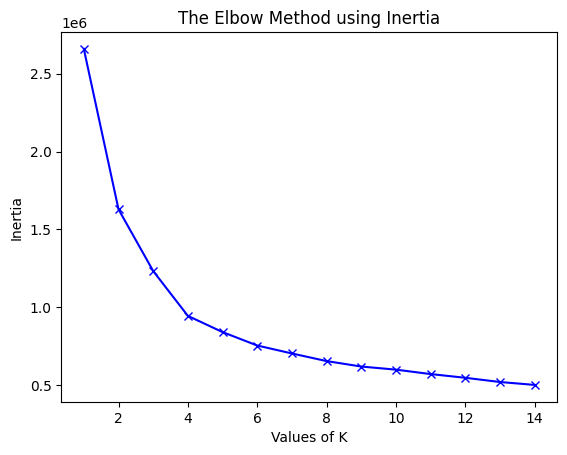

In [26]:
inertia = []
range_val = range(1,15)
for i in range_val:
  kmean = KMeans(n_clusters=i)
  kmean.fit_predict(pd.DataFrame(data))
  inertia.append(kmean.inertia_)
plt.plot(range_val,inertia,'bx-')
plt.xlabel('Values of K') 
plt.ylabel('Inertia') 
plt.title('The Elbow Method using Inertia') 
plt.show()

## And do the same for DBSCAN

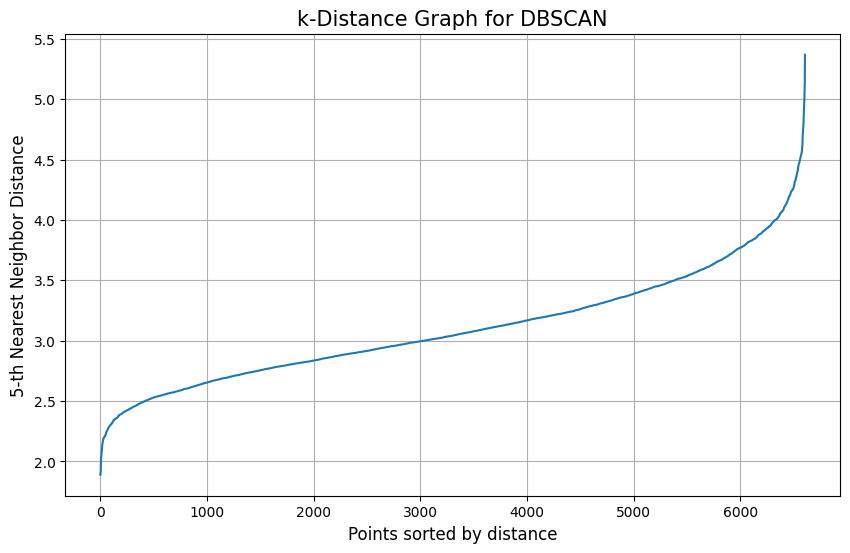

In [31]:
from sklearn.neighbors import NearestNeighbors
import numpy as np
import matplotlib.pyplot as plt

k = 5

neighbors = NearestNeighbors(n_neighbors=k)
neighbors_fit = neighbors.fit(X_scaled)
distances, indices = neighbors_fit.kneighbors(X_scaled)

distances = np.sort(distances[:, k-1], axis=0)

plt.figure(figsize=(10, 6))
plt.plot(distances)
plt.xlabel('Points sorted by distance', fontsize=12)
plt.ylabel(f'{k}-th Nearest Neighbor Distance', fontsize=12)
plt.title('k-Distance Graph for DBSCAN', fontsize=15)
plt.grid(True)
plt.show()


In [11]:
results = {}

In [56]:
dbscan = DBSCAN(eps=3, min_samples=4)
dbscan_labels = dbscan.fit_predict(X_scaled)
results['DBSCAN'] = evaluate(dbscan_labels, 'DBSCAN')

In [28]:
agglo = AgglomerativeClustering(n_clusters=5)
agglo_labels = agglo.fit_predict(X_scaled)
results['Agglomerative'] = evaluate(agglo_labels, 'Agglomerative')

In [29]:
kmeans = KMeans(n_clusters=4, random_state=69)
kmeans_labels = kmeans.fit_predict(X_scaled)
results['KMeans'] = evaluate(kmeans_labels, 'KMeans')

In [57]:
for model_name, metrics in results.items():
    print(f"\n=== {model_name} ===")
    for metric_name, value in metrics.items():

        print(f"{metric_name}: {value:.4f}")


=== DBSCAN ===
Clusters: 25.0000
Silhouette Score: -0.1153
ARI: 0.0018

=== Agglomerative ===
Clusters: 5.0000
Silhouette Score: 0.0421
ARI: 0.0020

=== KMeans ===
Clusters: 4.0000
Silhouette Score: 0.0361
ARI: 0.0300


In [49]:
sample_idx = np.random.choice(len(X), size=1000, replace=False)

In [59]:
features_for_plot = ['Hours_Studied', 'Attendance']
X_plot = data[features_for_plot].iloc[sample_idx]

C:\Users\Khan\AppData\Local\Temp\ipykernel_13860\3542747571.py:6: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap('tab10', len(unique_labels))


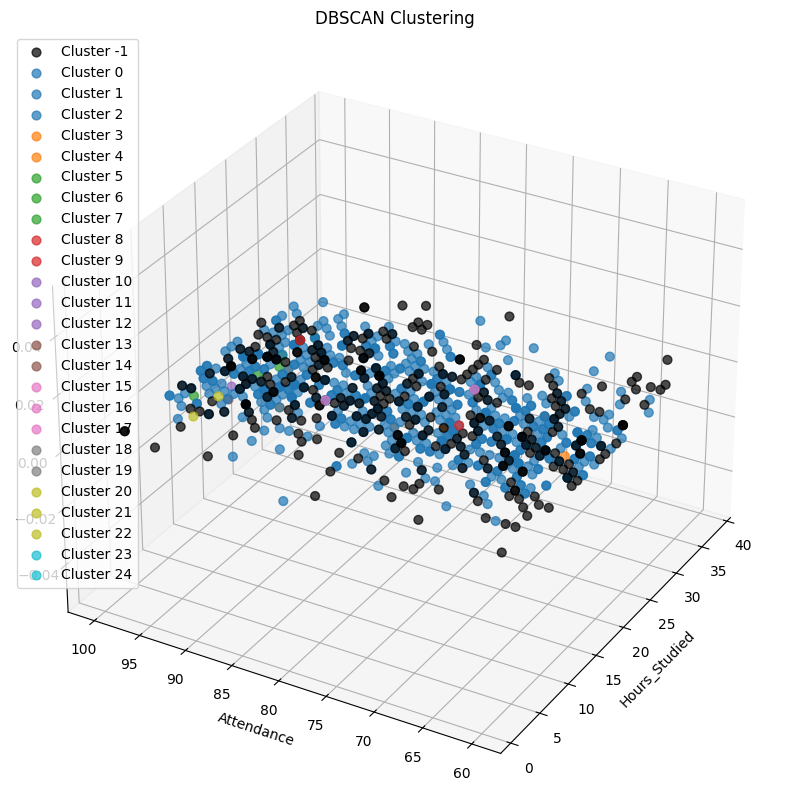

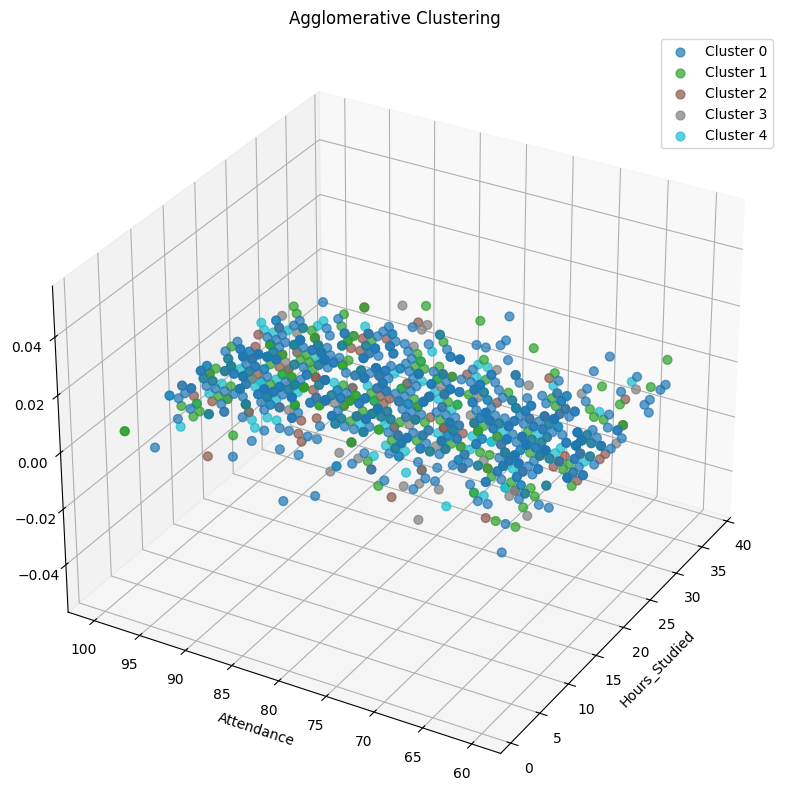

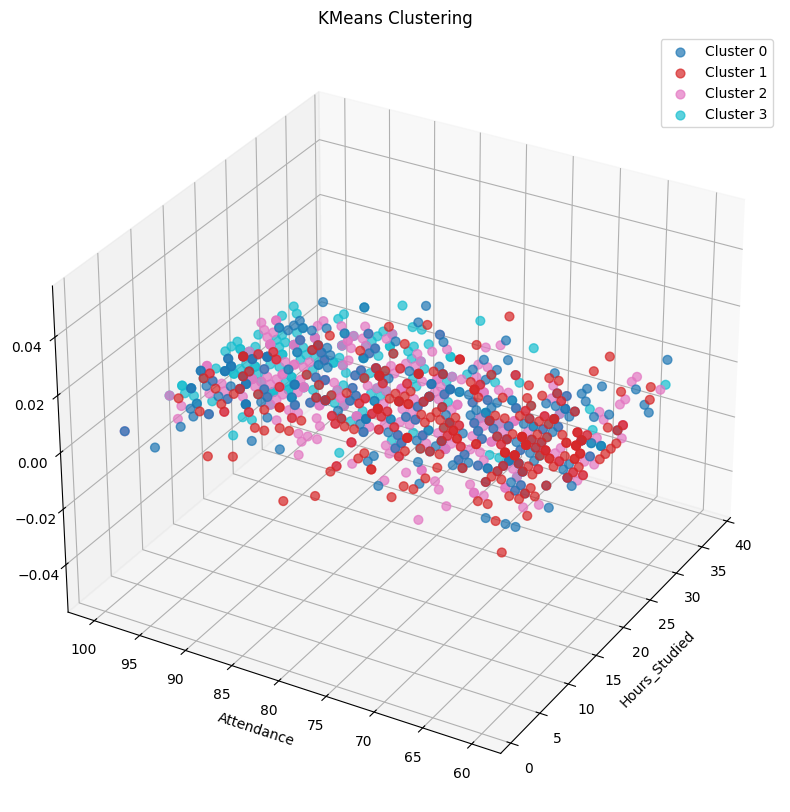

In [61]:
def plot_clusters(X_plot, labels, title):
    fig = plt.figure(figsize=(16, 10))
    ax = fig.add_subplot(111, projection='3d')
    
    unique_labels = np.unique(labels)
    colors = plt.cm.get_cmap('tab10', len(unique_labels))

    for label in unique_labels:
        cluster_points = X_plot[labels[sample_idx] == label]
        ax.scatter(
            cluster_points.iloc[:, 0],
            cluster_points.iloc[:, 1],
            s=40,
            label=f"Cluster {label}",
            color=colors(label) if label != -1 else 'black',  # выбросы — черным
            alpha=0.7
        )
    
    ax.set_xlabel(features_for_plot[0])
    ax.set_ylabel(features_for_plot[1])
    ax.view_init(30, 210)
    plt.title(title)
    plt.legend()
    plt.show()

# Визуализация для каждого алгоритма
plot_clusters(X_plot, dbscan_labels, "DBSCAN Clustering")
plot_clusters(X_plot, agglo_labels, "Agglomerative Clustering")
plot_clusters(X_plot, kmeans_labels, "KMeans Clustering")
